 # University of Stirling

 # ITNPBD2, Representing and Manipulating Data

 # Assignment 2019

 # An analysis of the book, Around the World in 80 Days by Jules Verne

 This notebook forms the assignment instructions and submission document of the assignment for ITNPBD2 in 2019. Read the instructions carefully and enter code into the cells as indicated.

 You will need to download the text of the book from Canvas - it is in the same place as this file, and called aroundTW80Days.txt.

 Rename this file to be xxxxxx_BD2 where xxxxxx is your student number, then type your code into the boxes provided. Each question is given in a markdown call, and there is an empty box beneath each one where you enter your answer. These boxes should contain 2 things:

 - **The code that performs the required task**
 - **Comments that explain your code**

 Marks are given for both code (70%) and style and comments (30%). If you cannot get the code to work properly, you will still get some marks for correct comments. The marks available for each question are given in square brackets in each title.

 # Submission and Other Notes

 - Submit your notebook to canvas when it is complete
 - Make sure the version you submit contains the results of running every cell. The output should be visible without the need to run the code again

 ## Plagiarism

 Plagiarism is presenting somebody else’s work as your own. Plagiarism is a form of academic misconduct and is taken very seriously by the University. Students found to have plagiarised work can have marks deducted and, in serious cases, even be expelled from the University. Do not submit any work that is not entirely your own.

 The University’s full guidance on academic misconduct can be found here:

 http://stir.ac.uk/1x0


 ## 1) Open the file `aroundTW80Days.txt` and read its contents into a string [3]


 1. Print the number of characters (letters, etc) in the whole book
 2. Split the book into a Python list containing all the words of the book in order. At this stage, use string splitting, not a more fancy library like `nltk`. Call this variable `book_list`
 3. Print the number of words in the book
 4. Print the first 10 words of the book. It should look like this:

 `['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Around', 'the', 'World', 'in', '80', 'Days,']`

In [1]:
import random
import string

# read the book into a string, use 'r' to prevent reading of special characters in the file name
# and replace new line ('\n') characters with a white space
data = open(r"aroundTW80Days.txt", "r").read().replace('\n',' ')

# Clean the data
# Split the book into words
book_words = data.split()

# create new list, from book_list, with no punctuation, called book_no_punc
book_no_punc = list()
for word in book_words:
    book_no_punc.append(word.strip(string.punctuation))

# 1. Number of characters in the book
print("Number of characters in the book:", len(data))
# 2. Split the book into a sorted list
book_list = sorted(list(book_words))
rnd = random.randint(100, 109)
print("Random sample from the sorted book:", book_list[rnd:rnd+5])
# 3. Number of words in the book
print("Number of words in the book:", len(book_words))
# 4. The first 10 words of the book
print("The first 10 words from the book:", book_words[0:10])


Number of characters in the book: 390222
Random sample from the sorted book: ['"Are', '"Are', '"Arrived', '"As', '"As']
Number of words in the book: 66313
The first 10 words from the book: ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Around', 'the', 'World', 'in', '80']


 ## 2) Now create a set containing all the unique words in the book [3]
 - Print the number of unique words it finds

In [2]:
# Set stores values only once, so we're going to convert the list containing
# all the words in the book into a set, hence getting all the unique words
# but first we need to get rid of all the punctuation signs so we don't 
# count, e.g., "Francisco?" and "Francisco" as two unique words

book_no_punc = list()
# create new list, from book_list, with no punctuation, called book_no_punc
for word in book_words:
    book_no_punc.append(word.strip(string.punctuation))

# convert book_no_punc list into a set to obtain the unique values
book_unique = set(book_no_punc)
print(book_unique)


{'', 'Anam', 'twenty-four', 'bones', 'sage', 'cadaverous', 'disclaimer', 'twenty', 'bellowings', 'nowadays', 'spars', 'many', 'conscience', 'Burdwan', 'At', 'Solomon', 'fortifications', 'compose', 'intelligent', 'disc', 'off', 'bases', 'oyster', 'donate', 'perceive', 'brass', 'public', 'leap', 'ensure', 'pernicious', 'forty', 'Havre', 'scientific', 'Anglo-Saxons', 'placed', 'dear', 'sorry', 'AND', 'dared', 'taste', 'armed', 'reading', 'Middle', 'robber', 'tax', 'to-morrow', 'rope', 'Nassik', 'safe', 'warned', 'contest', 'younger', 'islets', 'GUTENBERG', 'smoker', 'immediately', 'synonymous', 'uses', 'Calais', 'Without', 'hairs', 'treat', 'member', 'clenched', 'Davenport', 'Judge', 'highways', 'forest', 'hamlet', 'magnificent', 'eighty-six', 'GO', 'REPEAT', 'turbans', 'rice', 'reverse', 'helping', 'senseless', 'conquering', 'Street', 'rebuild', 'belonging', 'papers', 'Messrs', 'religion', 'crowds', 'barrows', 'solid', 'valet', 'Pardon', 'toilets', 'enormous', 'tea-house', 'south-easterl

 ## 3) Build a Dictionary of the words used in the book [3]
 - Build a Python dictionary (`dict`) in which the keys are the unique words in the book and the values are dictionary objects with fields `length` for word length and `freq` for frequency, e.g.:

 `{'the': {'length': 3, 'freq': 4303}}`


In [3]:
book_dict = dict()

# !!! WARNING !!! - long execution! Only use if you need the whole dictionary in the memory, otherwise
# use the generator version instead

# create a dictionary of words with words as the key and a tuple with its length and frequency
# for word in book_no_punc:
#     book_dict.update({word: (len(word), book_no_punc.count(word))})
# print(book_dict)


In [4]:
# generator version of the same dictionary
gen_book_dic = (book_dict.update({word: (len(word), book_no_punc.count(word))}) for word in book_no_punc)
# print(gen_book_dic)


 ## 4) Use the dictionary that you created above to find the most commonly used word in the book [3]
 - Print the word and the number of times it appeared in the book

In [5]:
# We're using the book_no_punc list because we don't want to count
# "Francisco?" and "Francisco" twice and get two unique keys and values
print(max(book_no_punc, key=lambda x: book_no_punc[1]))


The


 ## 5) Write a generator function to produce each word and its length each time it yields a value [6]

 - The function should accept a single argument: the list of words in the book
 - It should yield a tuple (word, word_len)
 - Call the function to create a generator but do not iterate over it at this stage

In [6]:
# generator expression which yields a tuple of a word and its length
wordLenghtGenerator = ((word, len(word)) for word in book_no_punc)


 ## 6) Use a comprehension over the generator you just made to list all the words with 9 letters [6]

 - Print all those words
 - Extra points if each word is selected only once

In [7]:
# generator expression which yields a tuple of a word of length 9 and its length, which is 9
wordLenghtGenerator = ((word, len(word)) for word in book_no_punc if len(word) == 9)

# printing words of lenght 9 using the generator expression
for word in wordLenghtGenerator:
    print(word)

# printing words of lenght 9 only once using the generator expression
seen_before = list()

for word in wordLenghtGenerator:
    if word not in seen_before:
        seen_before.append(word)

for word in seen_before:
    print(word)

# display(seen_before)


('Gutenberg', 9)
('Gutenberg', 9)
('GUTENBERG', 9)
('CONVINCED', 9)
('DETECTIVE', 9)
('PASSPORTS', 9)
('BEAUTIFUL', 9)
('BANKNOTES', 9)
('DISGORGES', 9)
('THOUSANDS', 9)
('SINGAPORE', 9)
('TANKADERE', 9)
('ANTIPODES', 9)
('FRANCISCO', 9)
('UNDERGOES', 9)
('INCIDENTS', 9)
('RAILROADS', 9)
('DETECTIVE', 9)
('INTERESTS', 9)
('HAPPINESS', 9)
('attention', 9)
('personage', 9)
('resembled', 9)
('Byron--at', 9)
('Certainly', 9)
("Lincoln's", 9)
('resounded', 9)
('Exchequer', 9)
('certainly', 9)
('gentleman', 9)
('societies', 9)
("Artisan's", 9)
('societies', 9)
('admission', 9)
('exclusive', 9)
('regularly', 9)
('sometimes', 9)
('travelled', 9)
('corrected', 9)
('travelled', 9)
('charities', 9)
('congenial', 9)
('relatives', 9)
('certainly', 9)
('supported', 9)
('illumined', 9)
('resources', 9)
('club--its', 9)
('succulent', 9)
('swan-skin', 9)
('proffered', 9)
('porcelain', 9)
('decanters', 9)
('contained', 9)
('beverages', 9)
('eccentric', 9)
('confessed', 9)
('something', 9)
('sumptuous', 

('therefore', 9)
('extremely', 9)
('confident', 9)
('transport', 9)
('recovered', 9)
('delighted', 9)
('difficult', 9)
('completed', 9)
('traversed', 9)
('estimated', 9)
('important', 9)
('described', 9)
('obstacles', 9)
('lessening', 9)
('resounded', 9)
('sheltered', 9)
('Liverpool', 9)
('detective', 9)
('sacrifice', 9)
('different', 9)
('perceived', 9)
('whiteness', 9)
('Sometimes', 9)
('ferocious', 9)
('perceived', 9)
('landmarks', 9)
('stretched', 9)
('stiffened', 9)
('important', 9)
('connected', 9)
('confessed', 9)
('regretted', 9)
('Davenport', 9)
('beautiful', 9)
('separated', 9)
('gentleman', 9)
('traversed', 9)
('Liverpool', 9)
('admirable', 9)
('Liverpool', 9)
('movements', 9)
('obstacles', 9)
('incidents', 9)
('to-morrow', 9)
('ferryboat', 9)
('agitation', 9)
('Liverpool', 9)
("instant's", 9)
('proceeded', 9)
('departure', 9)
('preparing', 9)
('admirable', 9)
('indicated', 9)
('departure', 9)
('Henrietta', 9)
('forthwith', 9)
('presented', 9)
('Henrietta', 9)
('Liverpool', 

 ## 7) Now iterate over your original list of words, `book_list` and find all the words with more than 14 letters, which do not contain any of these characters: [6]

 `. - \ /`

In [8]:
# generator to find words with 14 letters or more but without these special characaters `. - \ /` in them
fourteeen_letter = (word for word in book_no_punc if len(word) >= 14
    for c in word 
        if '-' not in word 
        if '.' not in word
        if '\\' not in word
        if '/' not in word)

for i in fourteeen_letter:
    print(i)


PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
PASSEPARTOUT'S
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
Ecclesiastical
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
mathematically
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
physiognomists
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passeparto

 ## 8) Split the book into a list of chapters [6]

  - This should be a list of strings
  - Hint - split on the word 'Chapter'
  - Call the list `chapter_list`


In [9]:
# This section answers Question 8 but it will also prepare the data to answer questions: 9, 10, 11 and 12

# these lists will become our 2D tables of:
# this will contain 'Chapter N' and its 'Description'
table_of_contents = list()
# this will contain 'Chapter N' and its 'Content'
chapters_and_content = list()

# Here we create our 2d tables.
# We're iterating through all the words in the book using 'book_words' list.
# We will look for the first occurence of - 'Chapter'. Because the table of contents is written
# in all capitals, the word - 'CHAPTER' - will be omitted as well as the chapters' description and 
# initial publisher notes - which we don't really need. Each chapter starts with the same 
# chapter description, as in the table of contents, so we will be able to get it differently.
# When we encounter the word 'Chapter' this means:
# - The next object is chapter's number.
# - Next are the uppercase letters so they're the chapter's description.
# - Next is the chapter's description, which will end with the next occurence of the word "Chapter";
# the exception is the last chapter, which ends with - '***' - and next are the publisher's notes. 
# We make sure to take this into consideration and not count the publisher's notes as the chapter's content,
# which would break the whole idea and would discupt the last chapter's word count.
# - This ends our iteration; we change the iterators value to point to the current place in the loop
#   and proceed to load the next chapter because it's already waiting in the cue!
i = 0
while i < len(book_words):
    # Here we will get the chapter's: name, number, description and content.
    if "Chapter" in book_words[i]:
        # Flush temporary holders to prepare them for the next chapters
        chapter_tag_holder = list()
        chapter_desc_holder = list()
        chapter_content_holder = str()
        chapter_content_holder.encode('utf-8', 'replace')

        # The next word is the chapter's number, so we save both in a list.
        chapter_tag_holder.append(book_words[i] + " " + book_words[i+1])
        # The next words are all in capitals and are the chapter's description.
        j = i+2
        # We keep interating until there are no capital letters left.
        while book_words[j].isupper():
            # Save the chapter's description in a list.
            chapter_desc_holder.append(book_words[j])
            j+=1
        # Use the previous list containing the chapter's name and number, like 'Chapter I',
        # and the new list that has its description to create a 2d list of chapters and their descriptions
        table_of_contents.append([chapter_tag_holder, chapter_desc_holder])
        # If we keep going until we encounter the next word 'Chapter', 
        # we can get the entire chapter into a string!
        while book_words[j] != "Chapter" and j != len(book_words)-1:
            # Make sure we don't go beyond the last chapter
            if book_words[j] != '***':
                current_word = book_words[j]
                chapter_content_holder += " " + str(book_words[j])
                j+=1
            else:
                break
        # Use the list containing the chapter name and number and the list with its content
        # to create a 2d table of chapters and their content.
        chapters_and_content.append([chapter_tag_holder, chapter_content_holder])
        # We finished loading the chapter's content because the current word is "Chapter" and next
        # is the next chapter and we want to do all the steps for it again
        # Continue iterating from where 'j' is pointing to.
        i=j
    else:
        i+=1

# create a list of chapters
chapter_list = [table_of_contents[i][0] for i in range(len(table_of_contents))]
# 
# display(chapter_list)

 ## 9) Remove the first entry from the chapter list [6]
 The first item in the chapter list is just the preface and chapter list. Copy that into a separate string variable and then remove it from the chapter list

In [10]:
# This question was handeled differently and there was no need for removal of the first entry


 ## 10) Now take each chapter and split it into a list of words, producing a list of lists - one for each chapter [6]

In [11]:
# This step was already done in the answer to Question 8
table_of_contents


[[['Chapter I'],
  ['IN',
   'WHICH',
   'PHILEAS',
   'FOGG',
   'AND',
   'PASSEPARTOUT',
   'ACCEPT',
   'EACH',
   'OTHER,',
   'THE',
   'ONE',
   'AS',
   'MASTER,',
   'THE',
   'OTHER',
   'AS',
   'MAN']],
 [['Chapter II'],
  ['IN',
   'WHICH',
   'PASSEPARTOUT',
   'IS',
   'CONVINCED',
   'THAT',
   'HE',
   'HAS',
   'AT',
   'LAST',
   'FOUND',
   'HIS',
   'IDEAL']],
 [['Chapter III'],
  ['IN',
   'WHICH',
   'A',
   'CONVERSATION',
   'TAKES',
   'PLACE',
   'WHICH',
   'SEEMS',
   'LIKELY',
   'TO',
   'COST',
   'PHILEAS',
   'FOGG',
   'DEAR']],
 [['Chapter IV'],
  ['IN',
   'WHICH',
   'PHILEAS',
   'FOGG',
   'ASTOUNDS',
   'PASSEPARTOUT,',
   'HIS',
   'SERVANT']],
 [['Chapter V'],
  ['IN',
   'WHICH',
   'A',
   'NEW',
   'SPECIES',
   'OF',
   'FUNDS,',
   'UNKNOWN',
   'TO',
   'THE',
   'MONEYED',
   'MEN,',
   'APPEARS',
   'ON',
   "'CHANGE"]],
 [['Chapter VI'],
  ['IN',
   'WHICH',
   'FIX,',
   'THE',
   'DETECTIVE,',
   'BETRAYS',
   'A',
   'VERY',
   'NA

 ## 11) Print only the titles from each chapter [6]
 - Clue: The title of each chapter is written in UPPER CASE and is the first thing in each chapter. Therefore, printing words until you find one that is not upper case will print the title.

In [12]:
for i in range(len(table_of_contents)):
    print(table_of_contents[i][1])


['IN', 'WHICH', 'PHILEAS', 'FOGG', 'AND', 'PASSEPARTOUT', 'ACCEPT', 'EACH', 'OTHER,', 'THE', 'ONE', 'AS', 'MASTER,', 'THE', 'OTHER', 'AS', 'MAN']
['IN', 'WHICH', 'PASSEPARTOUT', 'IS', 'CONVINCED', 'THAT', 'HE', 'HAS', 'AT', 'LAST', 'FOUND', 'HIS', 'IDEAL']
['IN', 'WHICH', 'A', 'CONVERSATION', 'TAKES', 'PLACE', 'WHICH', 'SEEMS', 'LIKELY', 'TO', 'COST', 'PHILEAS', 'FOGG', 'DEAR']
['IN', 'WHICH', 'PHILEAS', 'FOGG', 'ASTOUNDS', 'PASSEPARTOUT,', 'HIS', 'SERVANT']
['IN', 'WHICH', 'A', 'NEW', 'SPECIES', 'OF', 'FUNDS,', 'UNKNOWN', 'TO', 'THE', 'MONEYED', 'MEN,', 'APPEARS', 'ON', "'CHANGE"]
['IN', 'WHICH', 'FIX,', 'THE', 'DETECTIVE,', 'BETRAYS', 'A', 'VERY', 'NATURAL', 'IMPATIENCE']
['WHICH', 'ONCE', 'MORE', 'DEMONSTRATES', 'THE', 'USELESSNESS', 'OF', 'PASSPORTS', 'AS', 'AIDS', 'TO', 'DETECTIVES']
['IN', 'WHICH', 'PASSEPARTOUT', 'TALKS', 'RATHER', 'MORE,', 'PERHAPS,', 'THAN', 'IS', 'PRUDENT']
['IN', 'WHICH', 'THE', 'RED', 'SEA', 'AND', 'THE', 'INDIAN', 'OCEAN', 'PROVE', 'PROPITIOUS', 'TO', 'THE

 ## 12) Measure the length of each chapter and plot the values on a bar chart [9]
 - Draw a horizontal bar chart so you can read the chapter numbers down the left side
 - Set the headings to be `Chapter I` to `Chapter XXXVI` do this with code that extracts the chapter headings from the text, not by hand
 - Give the chart appropriate title and axis labels
 - Use whatever plotting library you like. Matplotlib is fine.

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

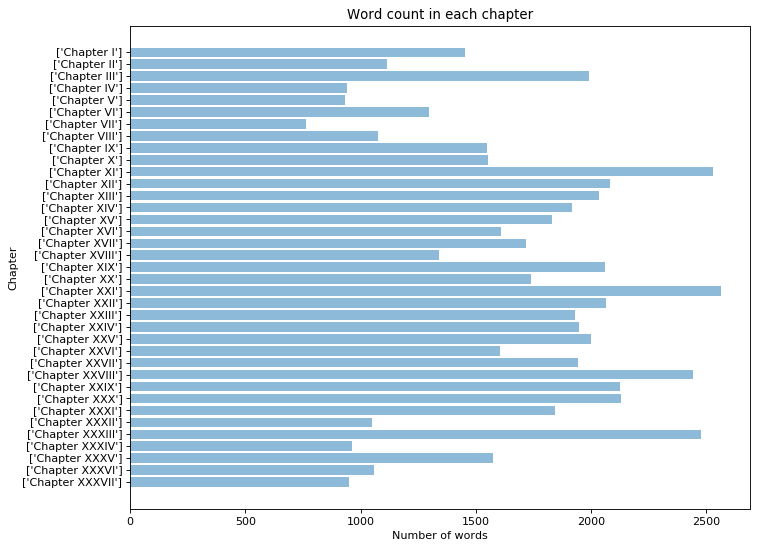

In [24]:
# increase the size of the plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# create a list of chapters' lengths
chapter_length = [len(chapters_and_content[i][1].split()) for i in reversed(range(len(chapters_and_content)))]

# prepare the bar chart for plotting
y_pos = np.arange(len(chapter_list))
plt.barh(y_pos, chapter_length, align='center', alpha=0.5)
plt.yticks(y_pos, reversed(chapter_list))
plt.ylabel('Chapter')
plt.xlabel('Number of words')
plt.title('Word count in each chapter')
# plot the bar chart
# TODO uncomment
plt.show()


 ## 13) Plot Locations Mentioned in the Book on a Map [9]

 - Using a plotting package of your choice, plot the locations of all the cities mentioned in the book
 - You can use the file called `cities.txt` to look up city names and locations
 - Look at its contents to work out how to use it. The locations are given as latitude, longitude, altitude (you won't need that last one!)
 - You should then write code that searches the book for all the cities in `cities.txt`. Any that it finds should be plotted on the map
 - Here is a useful list of words that appear in the book, but are NOT to be plotted:
 `['Victoria','San','Imperial','Come','San Pablo','Queenstown','Young','Lincoln','Forster','Formosa']`

In [18]:
# goetext was used to find all city names in the book.
# The library is not ideal and finds a lot of odd entires.
from geotext import GeoText

In [19]:
# using geotext library to find all cities in the book
places = GeoText(data)
# remove duplicates by converting city_names list to a set
city_names = list(set(places.cities))

# Cleaning the data - removing odd entries.
# There is one city in Czech Repubic called "Most", which is a determiner in English 
# but to GeoText, it looks like a name of a city.
# Because Phileas Fogg did not visit Most in Czech Republic, this entry is manually removed.
city_names.remove('Most')

# The data is further improved by removal of the entires that are not a city in the context of the book.
# Visual exploration of the produced map was also helpful.
# Many iterations were performed and to my best knowledge, Phileas Fogg did not visit:
# name
city_names.remove('Stuart')
# word
city_names.remove('Of')
# word
city_names.remove('Temple')
# continent
city_names.remove('Asia')
# word
city_names.remove('Auburn')
# word
city_names.remove('Mission')
# word
city_names.remove('Independence')
# word
city_names.remove('Imperial')
# name
city_names.remove('Wilson')
# word
city_names.remove('Deal')
# word
city_names.remove('Bay')
# word
city_names.remove('Union')
# word
city_names.remove('Cedar')
# indian tribe
city_names.remove('Sioux')
# name
city_names.remove('Fairbanks')
# rifle
city_names.remove('Enfield')
# nickname
city_names.remove('Athens')


In [20]:
# folium library is used to plot the cities on the map
import folium
# geopy library is used to find the city's coordinates based on its name
from geopy.geocoders import Nominatim

In [21]:
# create folium map
m = folium.Map(
    location=[0, 0],
    zoom_start=2.0,
    tiles='Stamen Terrain'
)
tooltip = 'Click for City\'s Name!'

geolocator = Nominatim(user_agent="phileas_fogg_journey")
# TODO uncomment 
# create a map of cities from the book
# for city in city_names:
#     location = geolocator.geocode(city)
#     folium.Marker(location=[location.latitude, location.longitude], popup=city, tooltip=tooltip).add_to(m)

# Plot the map of all the cities mentioned in the book (Might take a minute to load)
m

# Uncomment to save the map in html and get a better view
# m.save('80daysCities.html')

 ## 14) NLTK Sentiment Analysis [9]

 ## Use the VADER tool in the nltk library to analyse the sentiment of each chapter and plot the positive sentiment level over time on a chart

In [22]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

<class 'str'>
{'neg': 0.044, 'neu': 0.833, 'pos': 0.123, 'compound': 0.9992}


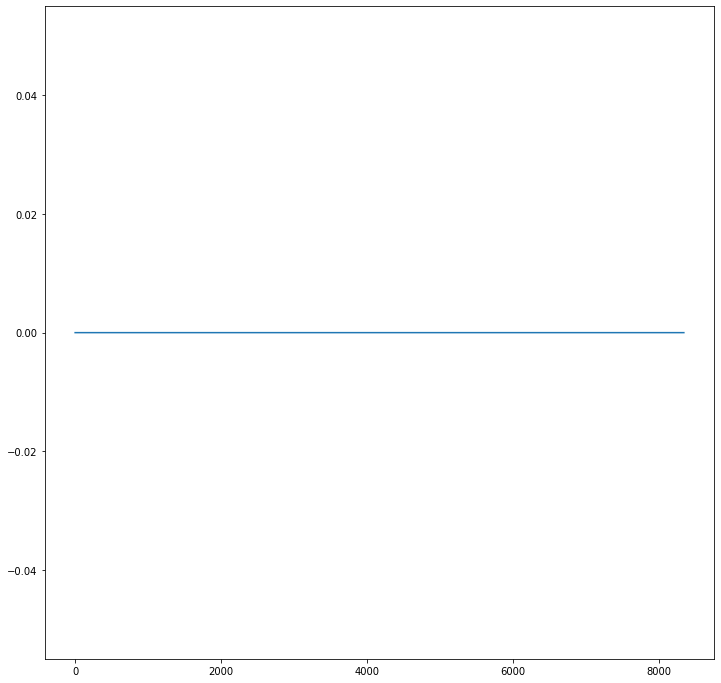

In [23]:
# Analyse Chapter I
chapter_1 = chapters_and_content[0][1]
print(type(chapter_1))
# chapter_1_tok = nltk.tokenize.sent_tokenize(chapter_1)
# print(chapter_1)
score = analyser.polarity_scores(chapter_1)
print(score)

# Plot the analysis
scores = [analyser.polarity_scores(sent)['compound'] for sent in chapter_1]
fig = plt.figure(figsize=(12,12))
plt.plot(scores)
# plt.show()


 ## 15) Now think of some further analysis you could do based on the text of this book [19]

 It should use other data sources you find online and tell an additional story around the data. Suggested data and sources include:

 - Travel and accommodation sites
 - User reviews of the book
 - Book sales data about this and other related books
 - News stories about places in the book
 - Travel times and distances
 - Pictures of places in the book

 Your analysis might consider how Phileas Fogg would travel if he had to make the same journey today - what would it cost, where might he stay, what would be happening in the places he would visit? How would you aquire the data you need? Can you connect to data online using REST? Do you need to perform scraping with something like ScraPy? What other packages would you need and what would you use them for?

 Write in English (not Python) about your idea including data sources, Python packages used, presentation and visualisation methods, and potential problems you can forsee.

 Add some example of code that perform some of the tasks required for your full analysis. You do not have to implement the whole idea, just some illustrative parts.

 Use as many cells below as you need - both code and markdown to explain your ideas. This part is worth 19 of the marks overall.


In [0]:
# An attempt to improve the cities mentioned in the book was made. To my best knowledge a succesful one but 
# the analysis could be further improved by plotting only the cities Phileas Fogg visited.
# A full journey with connections plotted between the cities could be made as well. 
# The connections could show the amount of time the journey took; this could be done interactively with a mouse hover
# over the link showing the journey's time. We could also show the time it would take today to travel that link and
# show up-to-date train and airplane schedules. This could be a fun tool to play with while reading the book, to see
# how much time it would take Phileas to travel not only today, but right now.
#  
# Google Maps would be a great help with this. We can get the travel calcualtion, time and locations.
# Google on its official github account has google maps python intergration tools (https://github.com/googlemaps/google-maps-services-python)
# and it features an example usage of finding a route between two geopoints:

# import googlemaps
# from datetime import datetime

# gmaps = googlemaps.Client(key='Add Your Key here')

# # Geocoding an address
# geocode_result = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')

# # Look up an address with reverse geocoding
# reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))

# # Request directions via public transit
# now = datetime.now()
# directions_result = gmaps.directions("Sydney Town Hall",
#                                      "Parramatta, NSW",
#                                      mode="transit",
#                                      departure_time=now)

# Given that it's a google maps tools we can get a lot more out of it: travel cost, weather conditions in the areas,
# pictures of the area, reviews and more.

# Using Scrapy, we could scrap google restaurant reviews and hotels, at the locations Phileas visited, and add these to our interactive map.
# It could be used to create a companion app for anyone who would like to travel the world like Phileas did; when they would be
# in the same location as Phileas was, it could send them a notification with the book's chapter relative to their current location.
# Getting the users location could also be done with google maps API.
# To show information about the place they're already are and the book's chapter we'd have to prepare the data, a bit like
# we did in question 12 of this assignment but a lot more thoroughly to ensure that all the places have a proper context and
# Phileas was actually travelling through them.

# In terms of image processing, if it was an ilustrated version of 'Around the World in 80 Days', we could use
# 'face_recognition' library (source: https://github.com/ageitgey/face_recognition) to analyse peoples' emotions
# in the pictures and plot 'an emotinal' journey that heroes of the book went through. This could combined with
# VADER sentiment analysis to see how these two compare.

# Futher analysis could involve scrapping the book's reviews from the web and see how they've changed over time.
# Have they improved, got worse? We could also look at the selling data, plot them over time, and see if there was any
# anomalies in the books popularity. Maybe they were related to some other events, like a premier of a movie adaptation?

# We could also scrap the web in search of 'Around the world in 80 days' themed events, like novel readings etc.
# This would also be a very good popularity indicator of a book that was published almost 150 years ago and is still
# very well known. It would be intersting to try to analyse this phenomena. Maybe scrapping the news and comparing the
# book's popularity charts would give us any results? Are people more inclined to read '80 days' in some particualr time?
# Like winter, when there's very little sun and prospect of travel are miniscule? All the unexpected things we can get from data
# make it so much more exciting!